In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
from qiskit.providers.fake_provider import *
import numpy as np 
import os

########## INPUT ############
f=5 # number of fake_backend want to choose
lower_limit= 3 # the lower limit of qubits for the circuit
upper_limit= 22 # the lower limit of qubits for the circuit
steps= 3 #jump in qubit numbers
name_of_algo='hamiltonian'

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, f)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.essex.fake_essex.FakeEssexV2,
 qiskit.providers.fake_provider.backends.yorktown.fake_yorktown.FakeYorktownV2,
 qiskit.providers.fake_provider.backends.casablanca.fake_casablanca.FakeCasablancaV2,
 qiskit.providers.fake_provider.backends.lagos.fake_lagos.FakeLagosV2,
 qiskit.providers.fake_provider.backends.johannesburg.fake_johannesburg.FakeJohannesburgV2]

In [3]:
benchmarks=[]
for i in range(lower_limit,upper_limit,steps):
    label = name_of_algo+str(i)
    benchmarks.append((supermarq.hamiltonian_simulation.HamiltonianSimulation(i),label))
for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("--------------------------",i[1],"---------------------------")
    #circuit.draw(output="mpl")
    print(circuit.draw())

-------------------------- hamiltonian3 ---------------------------
     ┌───┐┌───────────┐┌───┐                           ┌─┐                    »
q_0: ┤ H ├┤ Rz(-3π/4) ├┤ H ├──■────────────────■───────┤M├────────────────────»
     ├───┤├───────────┤├───┤┌─┴─┐┌──────────┐┌─┴─┐     └╥┘                 ┌─┐»
q_1: ┤ H ├┤ Rz(-3π/4) ├┤ H ├┤ X ├┤ Rz(-π/2) ├┤ X ├──■───╫───────────────■──┤M├»
     ├───┤├───────────┤├───┤└───┘└──────────┘└───┘┌─┴─┐ ║ ┌──────────┐┌─┴─┐└╥┘»
q_2: ┤ H ├┤ Rz(-3π/4) ├┤ H ├──────────────────────┤ X ├─╫─┤ Rz(-π/2) ├┤ X ├─╫─»
     └───┘└───────────┘└───┘                      └───┘ ║ └──────────┘└───┘ ║ »
c: 3/═══════════════════════════════════════════════════╩═══════════════════╩═»
                                                        0                   1 »
«        
«q_0: ───
«        
«q_1: ───
«     ┌─┐
«q_2: ┤M├
«     └╥┘
«c: 3/═╩═
«      2 
-------------------------- hamiltonian6 ---------------------------
     ┌───┐┌───────────┐┌───┐                          

In [4]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'hamiltonian3': [0.6666666666666666, 1.0, 0.26666666666666666, 0.7333333333333333, 0.0, 0.25], 'hamiltonian6': [0.3333333333333333, 1.0, 0.30303030303030304, 0.4298245614035088, 0.0, 0.1473684210526316], 'hamiltonian9': [0.2222222222222222, 1.0, 0.3137254901960784, 0.30158730158730157, 0.0, 0.10267857142857142], 'hamiltonian12': [0.16666666666666666, 1.0, 0.3188405797101449, 0.23198198198198197, 0.0, 0.07862407862407862], 'hamiltonian15': [0.13333333333333333, 1.0, 0.3218390804597701, 0.18840579710144928, 0.0, 0.06366459627329192], 'hamiltonian18': [0.1111111111111111, 1.0, 0.3238095238095238, 0.15858585858585858, 0.0, 0.05347593582887701], 'hamiltonian21': [0.09523809523809523, 1.0, 0.3252032520325203, 0.13690476190476192, 0.0, 0.04609375]}


In [6]:
%time
import time
jobs =[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("------------------------BACKEND-NAME :: ", backend().name)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        score_list=[]
        for i in range(0,5):
            start=time.time()
            job = backend().run(circuit, shots=1000)
            t_time=time.time()-start
            result=job.result()
            print("manually calculated time in execution ::",t_time)
            counts = job.result(0).get_counts()
            score = benchmark.score(counts)
            score_list.append(score)
        score = np.mean(score_list) 
        sd = np.std(score_list)
        print(label,"--> score::",score,"      SD ::",sd,"  time_taken=",job.result(0).time_taken)
        #counts=job.result(0).count()
        jobs.append((label,benchmark,backend,job,score,sd))
#jobs

CPU times: user 0 ns, sys: 1 µs, total: 1 µs
Wall time: 2.62 µs
=============SCORES OF ALL THE CIRCUITS=============
------------------------BACKEND-NAME ::  fake_essex
manually calculated time in execution :: 0.08358407020568848
manually calculated time in execution :: 0.04229545593261719
manually calculated time in execution :: 0.04745793342590332
manually calculated time in execution :: 0.04235267639160156
manually calculated time in execution :: 0.04467582702636719
hamiltonian3 --> score:: 0.9283132760733928       SD :: 0.00682999918659506   time_taken= 0.010746479034423828
manually calculated time in execution :: 0.04406595230102539
manually calculated time in execution :: 0.04054594039916992
manually calculated time in execution :: 0.04219675064086914
manually calculated time in execution :: 0.03983259201049805
manually calculated time in execution :: 0.04384493827819824
hamiltonian6 --> score:: 0.9403466094067255       SD :: 0.0024531159323966344   time_taken= 0.0773429870605468

In [7]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score,sd in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(fakes().name)
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   
#print(all_scores)    

USED BACKEND:: fake_essex ; CIRCUIT_NAME: hamiltonian3 ; SCORE = 0.9283132760733928


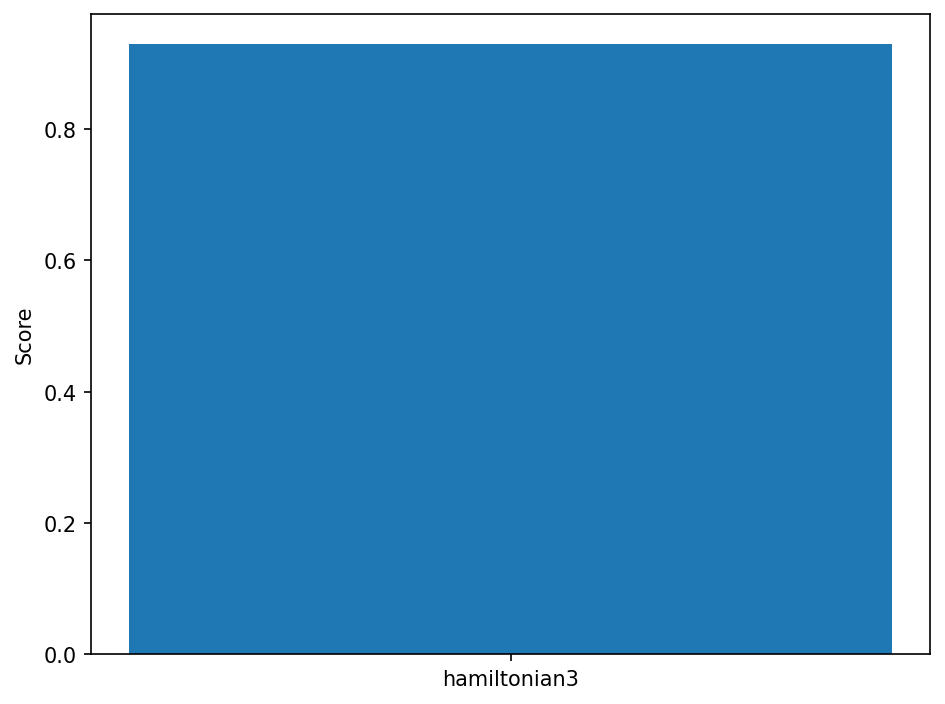

-----------------------------------------------------------
USED BACKEND:: fake_essex ; CIRCUIT_NAME: hamiltonian6 ; SCORE = 0.9403466094067255


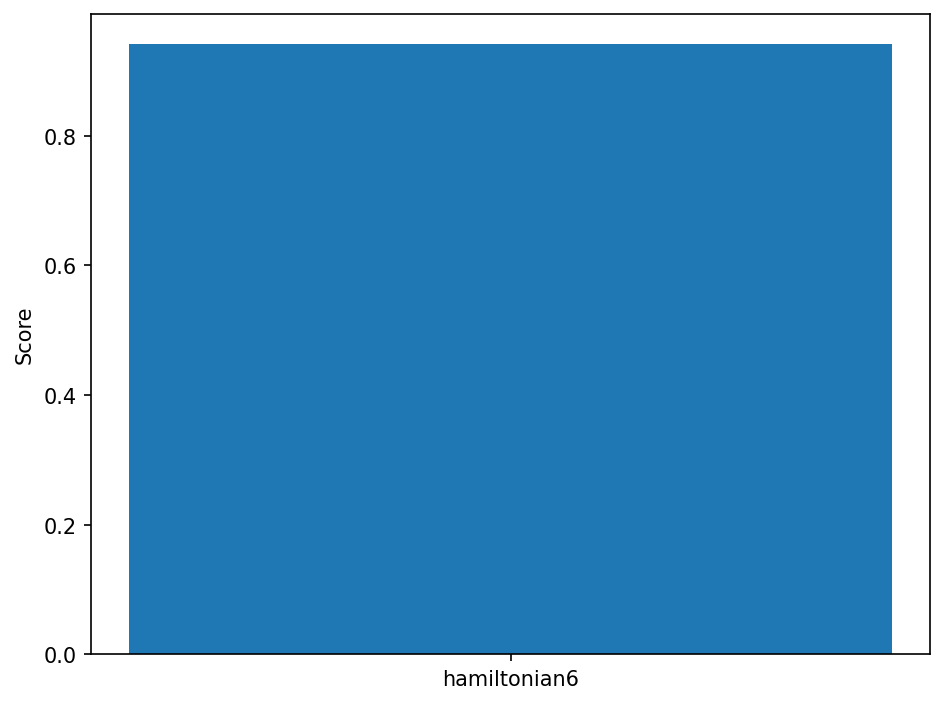

-----------------------------------------------------------
USED BACKEND:: fake_essex ; CIRCUIT_NAME: hamiltonian9 ; SCORE = 0.9543799427400591


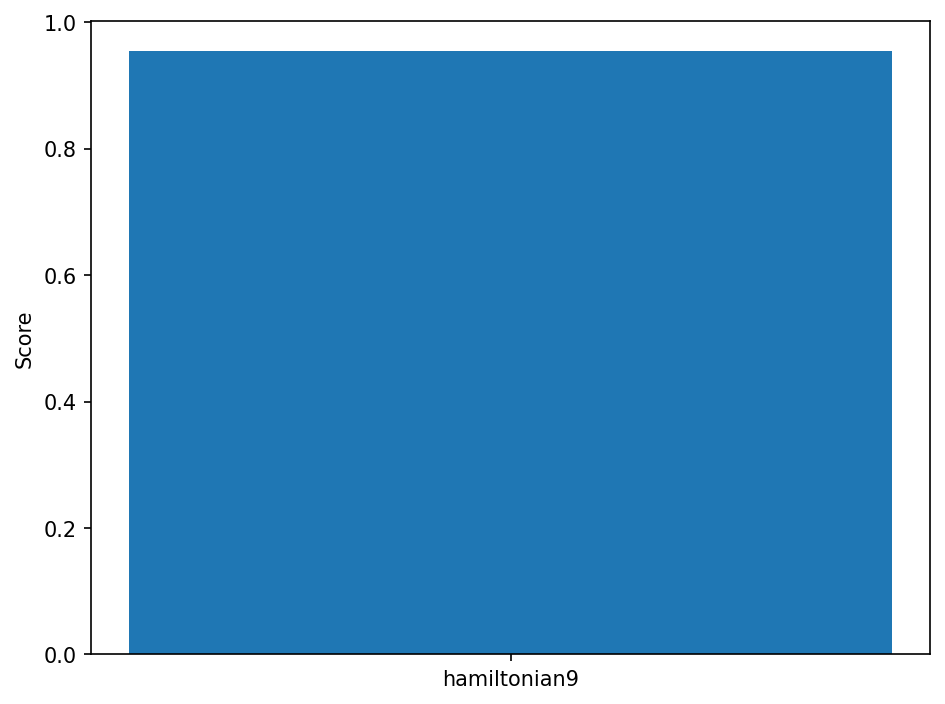

-----------------------------------------------------------
USED BACKEND:: fake_essex ; CIRCUIT_NAME: hamiltonian12 ; SCORE = 0.969213276073394


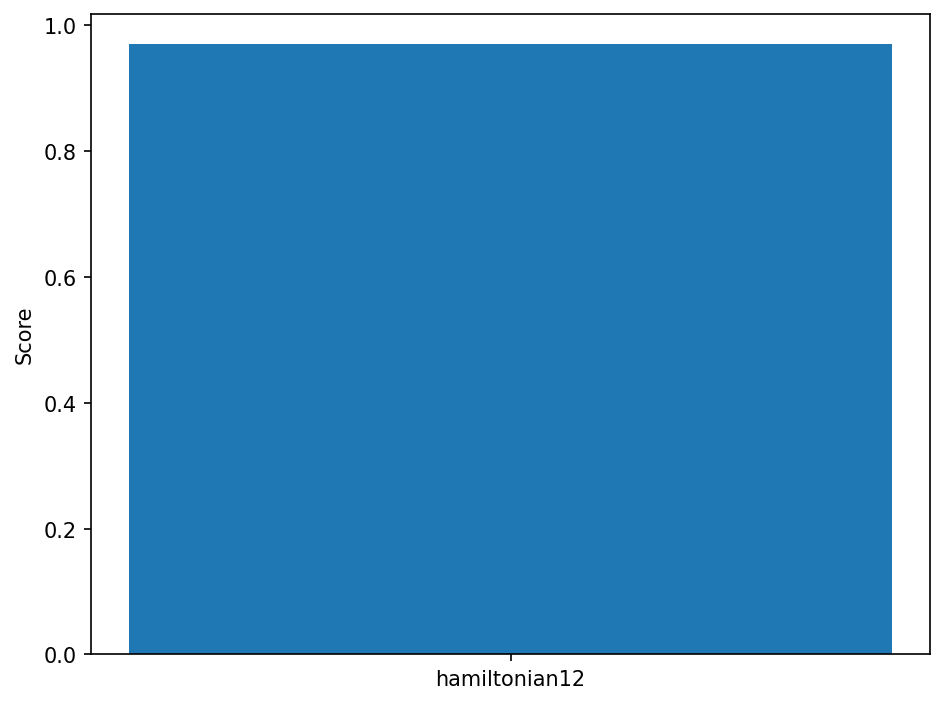

-----------------------------------------------------------
USED BACKEND:: fake_essex ; CIRCUIT_NAME: hamiltonian15 ; SCORE = 0.9750866094067281


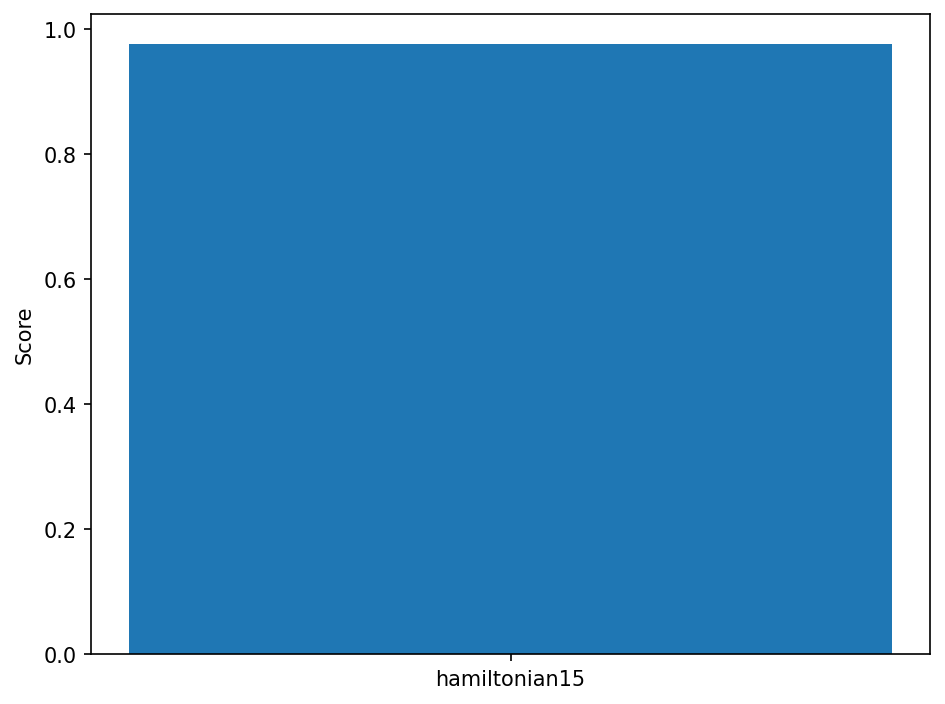

-----------------------------------------------------------
USED BACKEND:: fake_essex ; CIRCUIT_NAME: hamiltonian18 ; SCORE = 0.9788688316290612


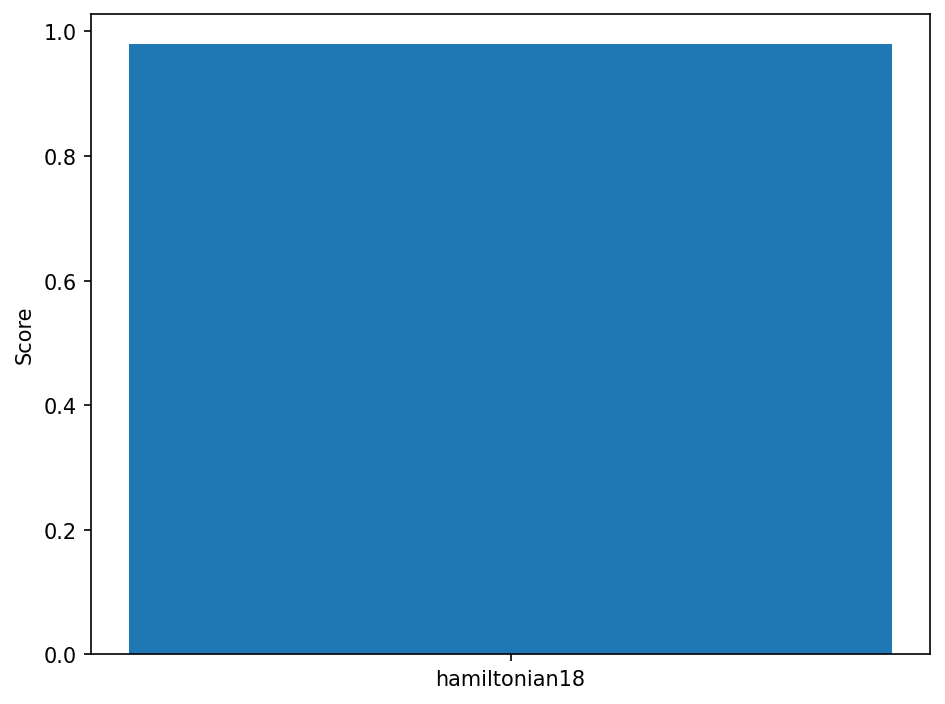

-----------------------------------------------------------
USED BACKEND:: fake_essex ; CIRCUIT_NAME: hamiltonian21 ; SCORE = 0.981865657026251


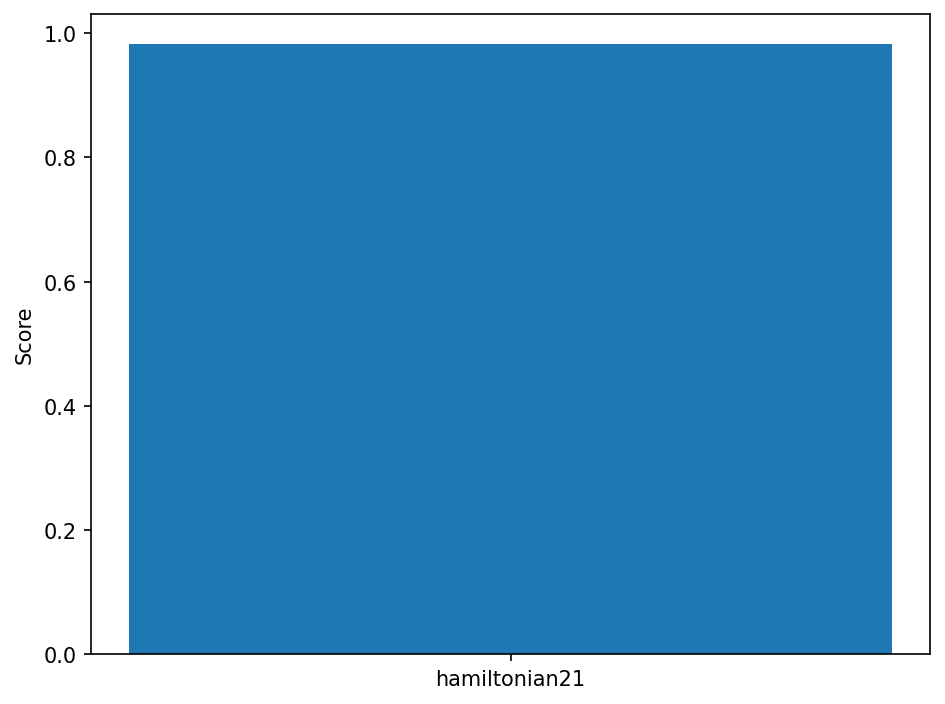

-----------------------------------------------------------
USED BACKEND:: fake_yorktown ; CIRCUIT_NAME: hamiltonian3 ; SCORE = 0.9123132760733925


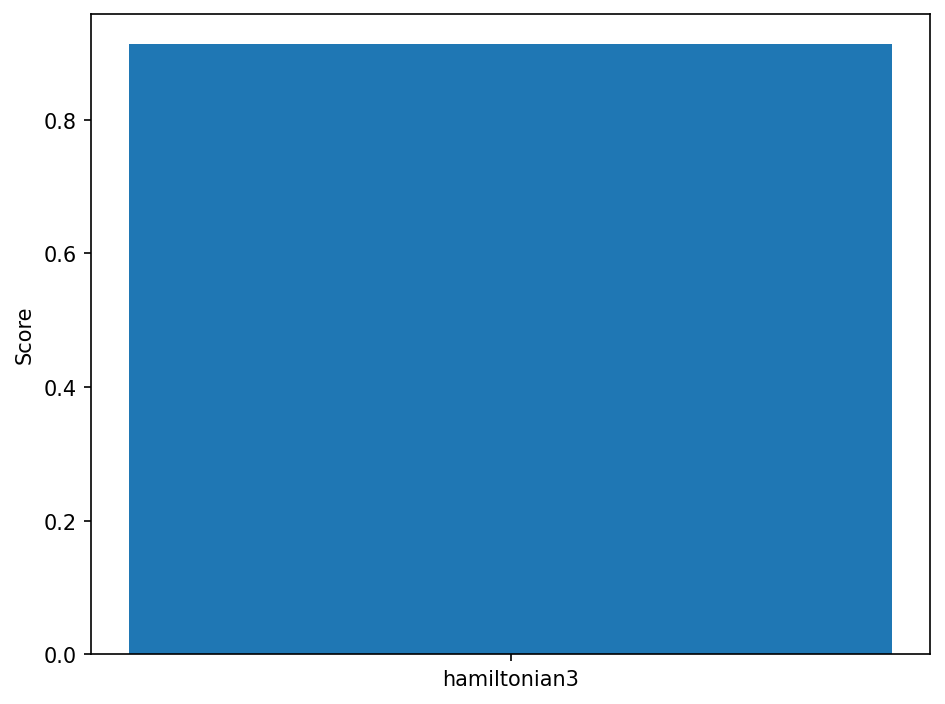

-----------------------------------------------------------
USED BACKEND:: fake_yorktown ; CIRCUIT_NAME: hamiltonian6 ; SCORE = 0.8740799427400591


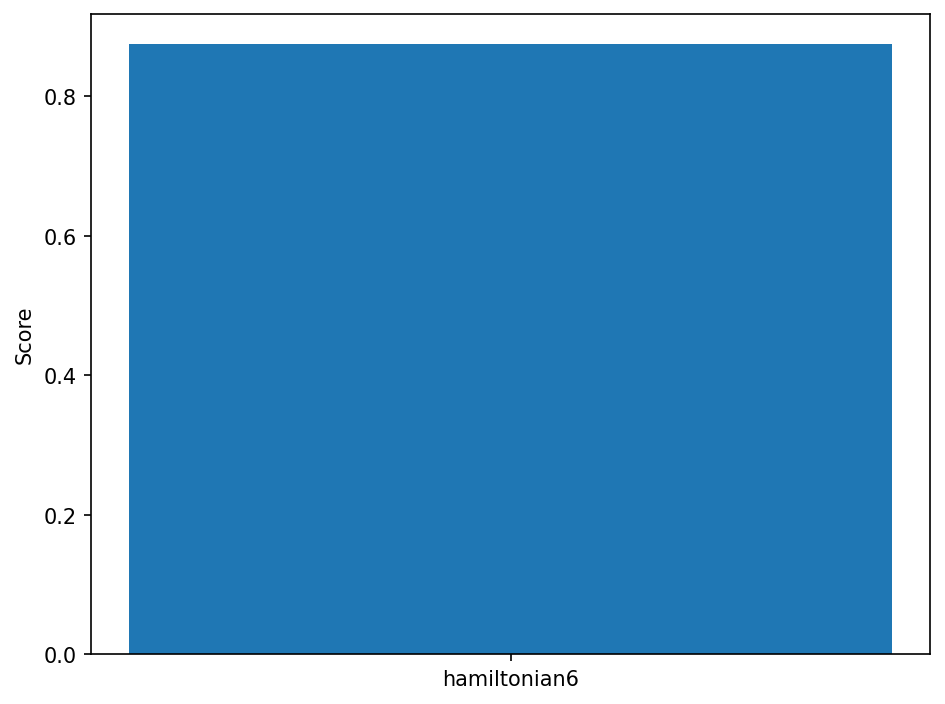

-----------------------------------------------------------
USED BACKEND:: fake_yorktown ; CIRCUIT_NAME: hamiltonian9 ; SCORE = 0.9176910538511702


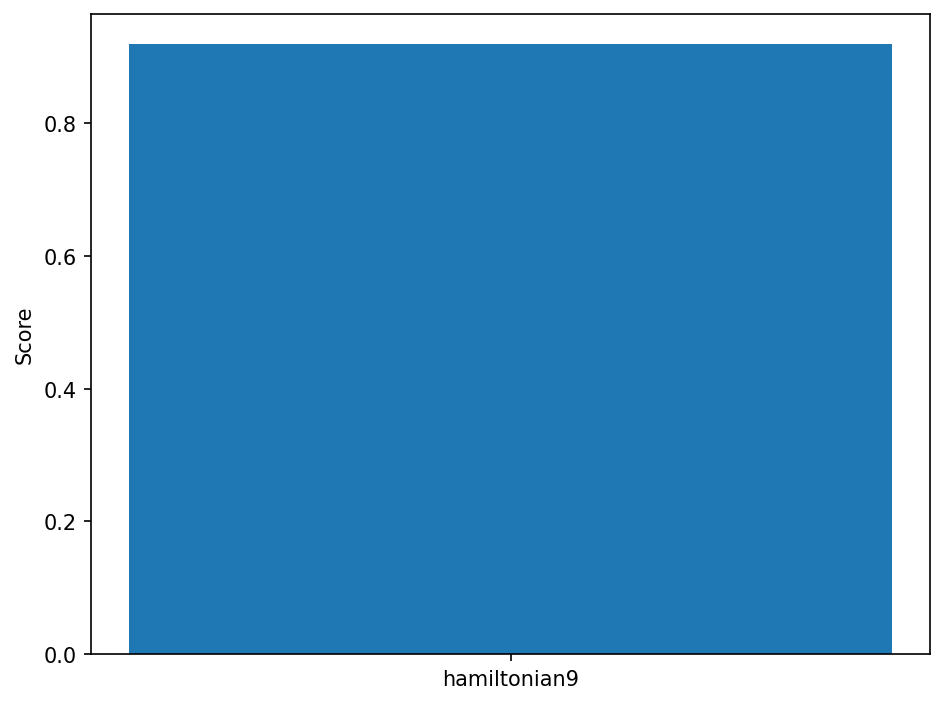

-----------------------------------------------------------
USED BACKEND:: fake_yorktown ; CIRCUIT_NAME: hamiltonian12 ; SCORE = 0.9354632760733941


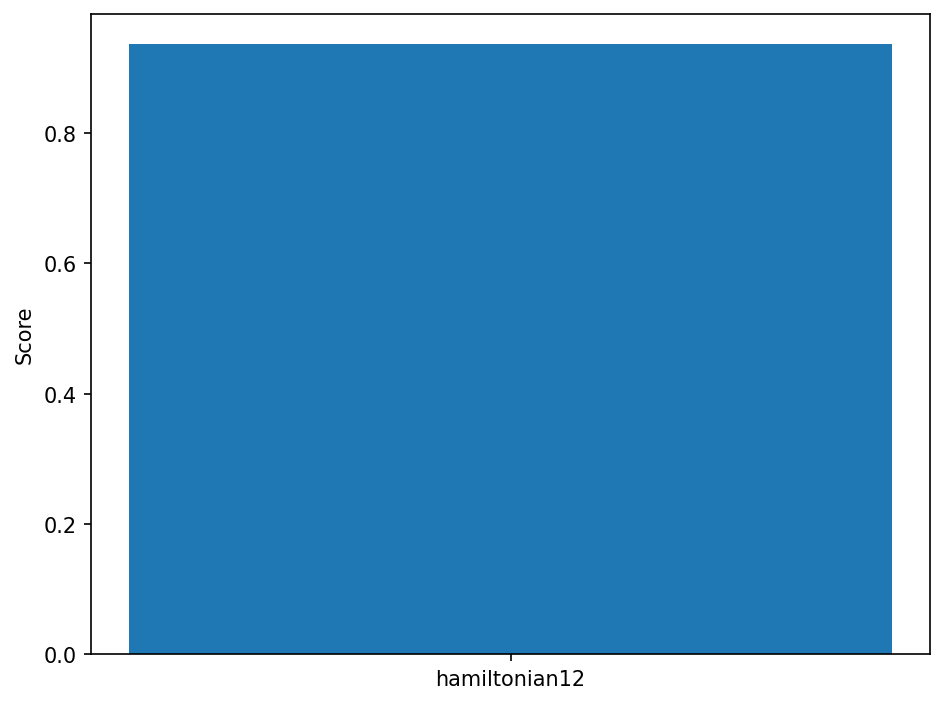

-----------------------------------------------------------
USED BACKEND:: fake_yorktown ; CIRCUIT_NAME: hamiltonian15 ; SCORE = 0.9480866094067281


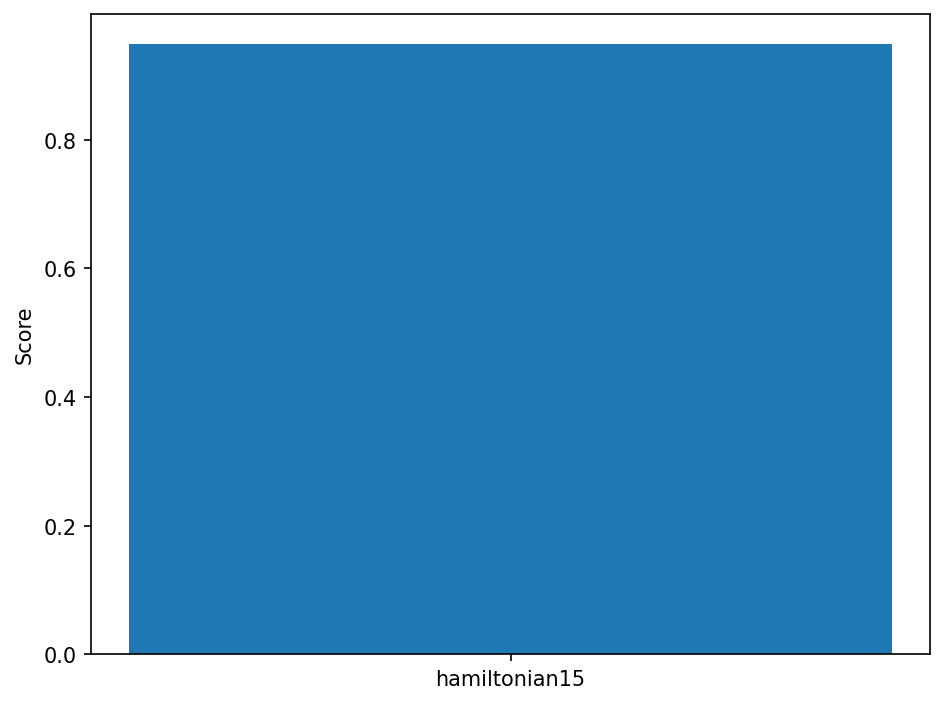

-----------------------------------------------------------
USED BACKEND:: fake_yorktown ; CIRCUIT_NAME: hamiltonian18 ; SCORE = 0.9574021649623944


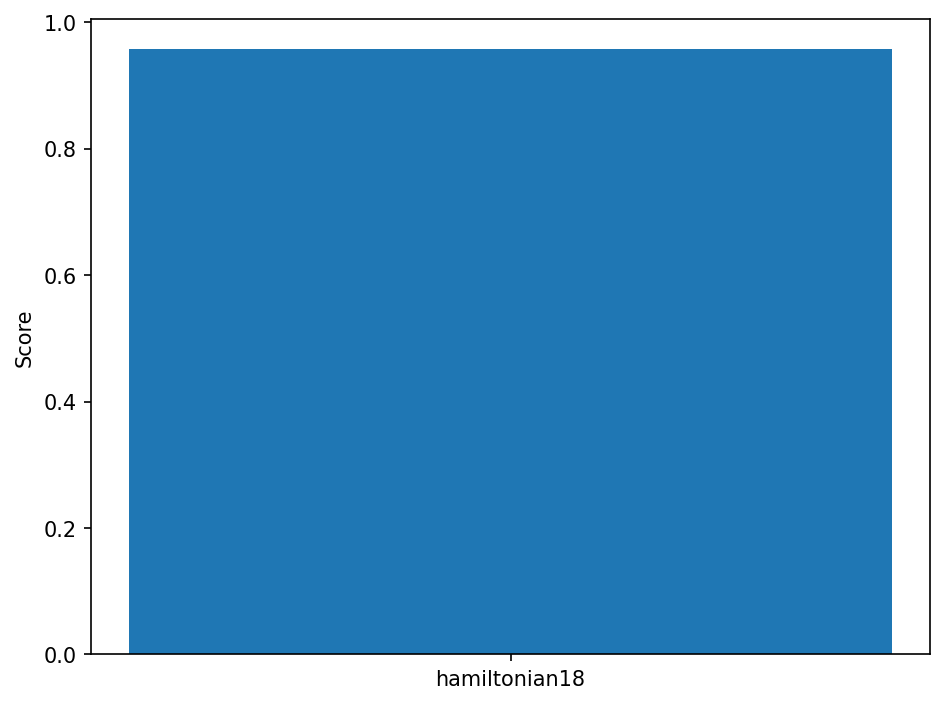

-----------------------------------------------------------
USED BACKEND:: fake_yorktown ; CIRCUIT_NAME: hamiltonian21 ; SCORE = 0.9616751808357753


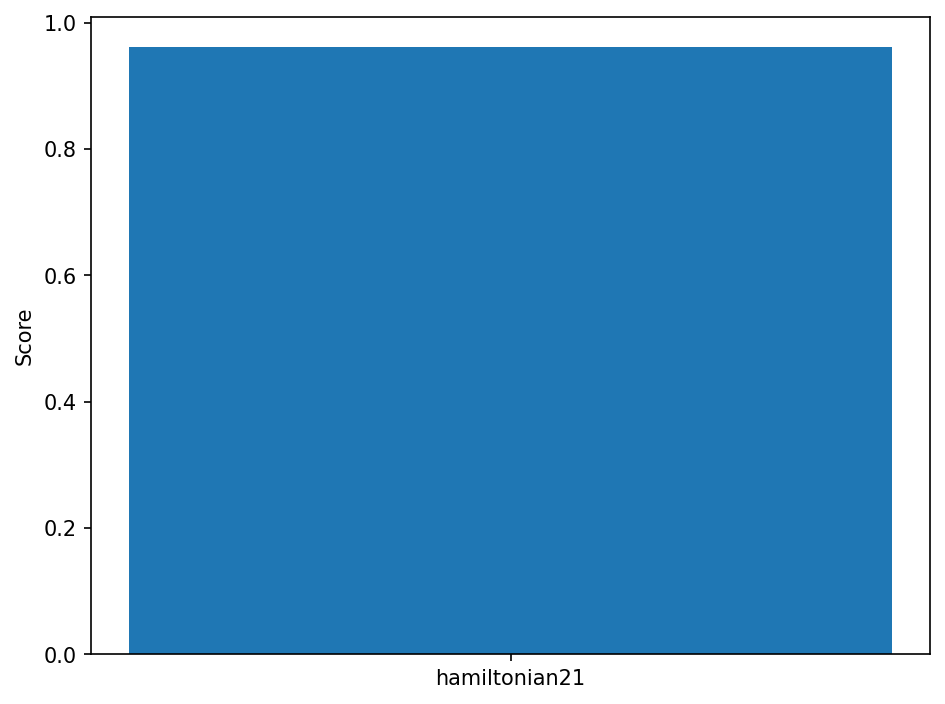

-----------------------------------------------------------
USED BACKEND:: fake_casablanca ; CIRCUIT_NAME: hamiltonian3 ; SCORE = 0.956046609406726


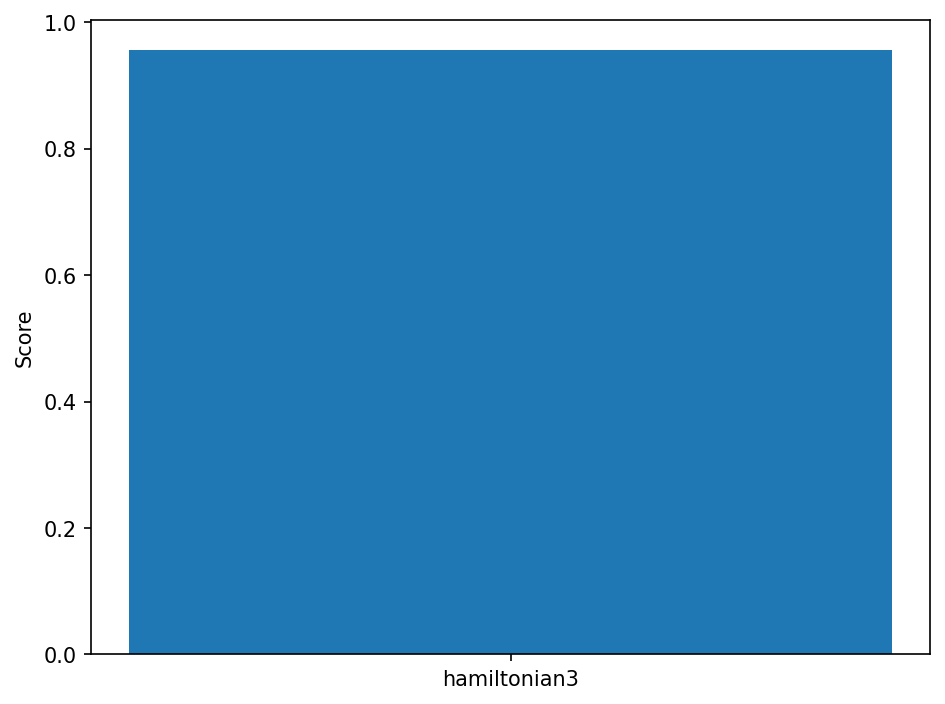

-----------------------------------------------------------
USED BACKEND:: fake_casablanca ; CIRCUIT_NAME: hamiltonian6 ; SCORE = 0.9669799427400589


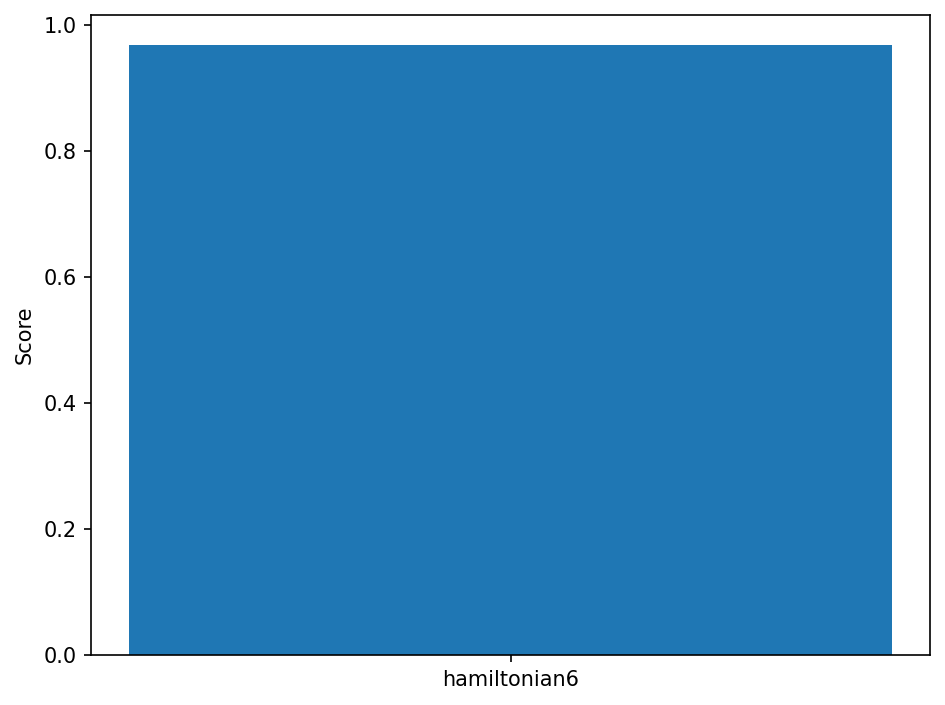

-----------------------------------------------------------
USED BACKEND:: fake_casablanca ; CIRCUIT_NAME: hamiltonian9 ; SCORE = 0.96709105385117


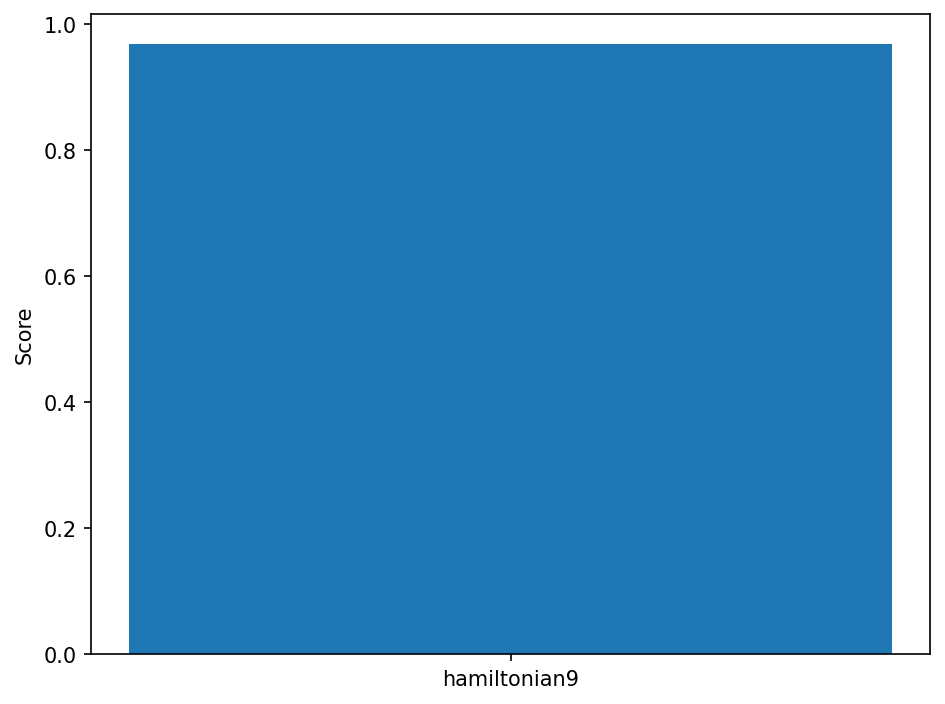

-----------------------------------------------------------
USED BACKEND:: fake_casablanca ; CIRCUIT_NAME: hamiltonian12 ; SCORE = 0.9775966094067275


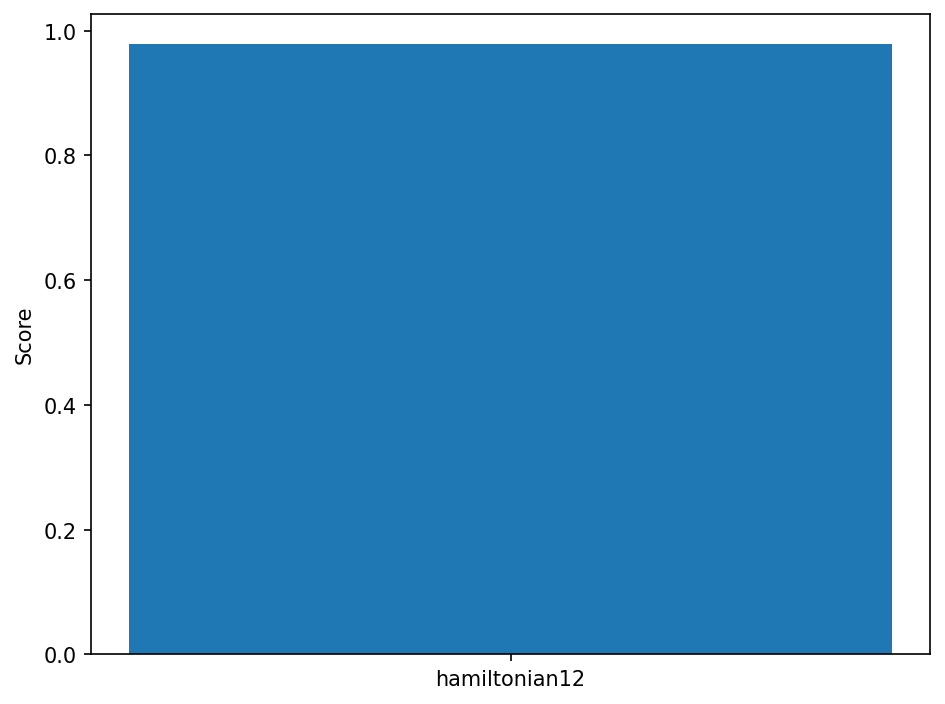

-----------------------------------------------------------
USED BACKEND:: fake_casablanca ; CIRCUIT_NAME: hamiltonian15 ; SCORE = 0.9814999427400617


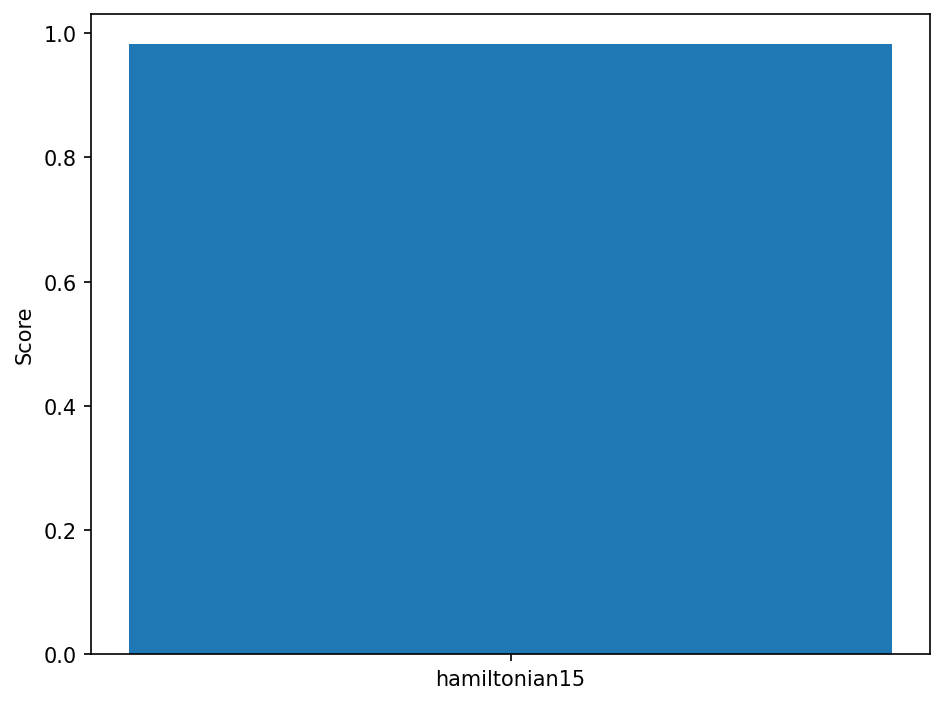

-----------------------------------------------------------
USED BACKEND:: fake_casablanca ; CIRCUIT_NAME: hamiltonian18 ; SCORE = 0.9843799427401722


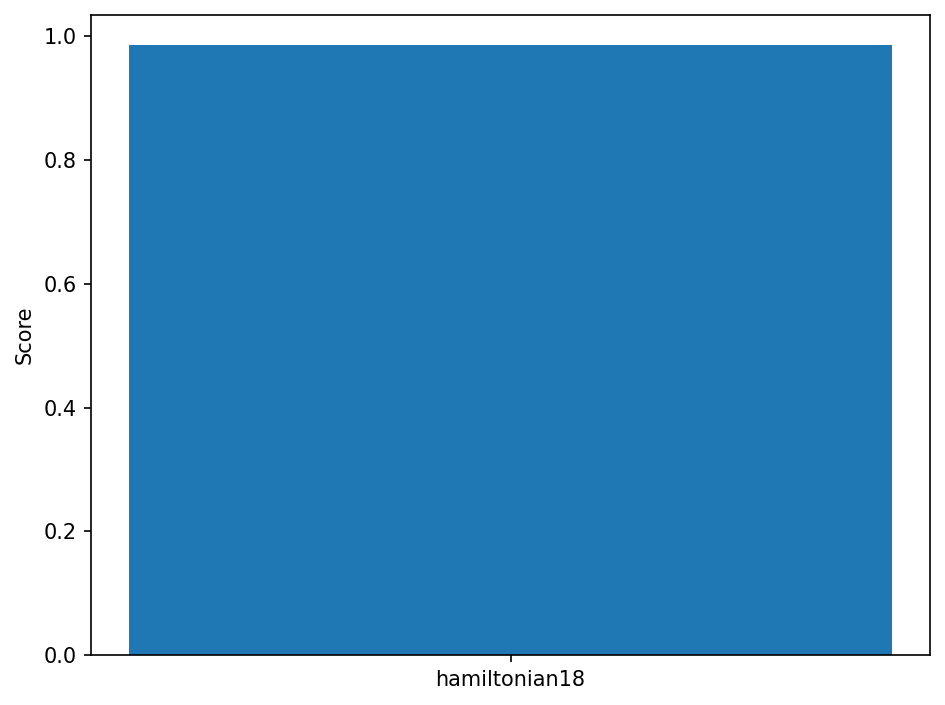

-----------------------------------------------------------
USED BACKEND:: fake_casablanca ; CIRCUIT_NAME: hamiltonian21 ; SCORE = 0.9878370855976796


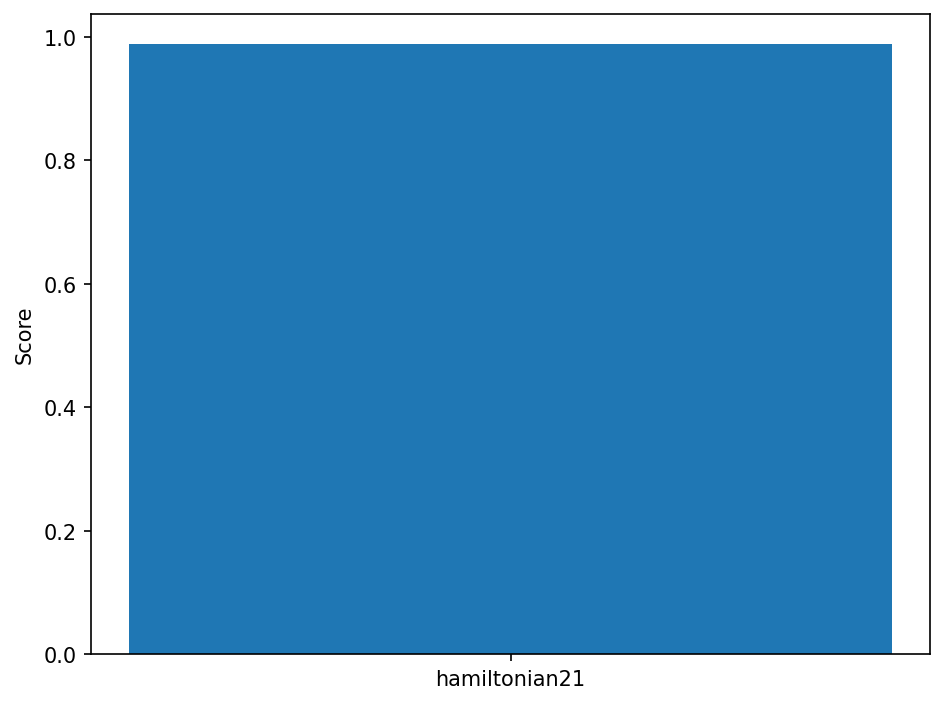

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: hamiltonian3 ; SCORE = 0.9848466094067259


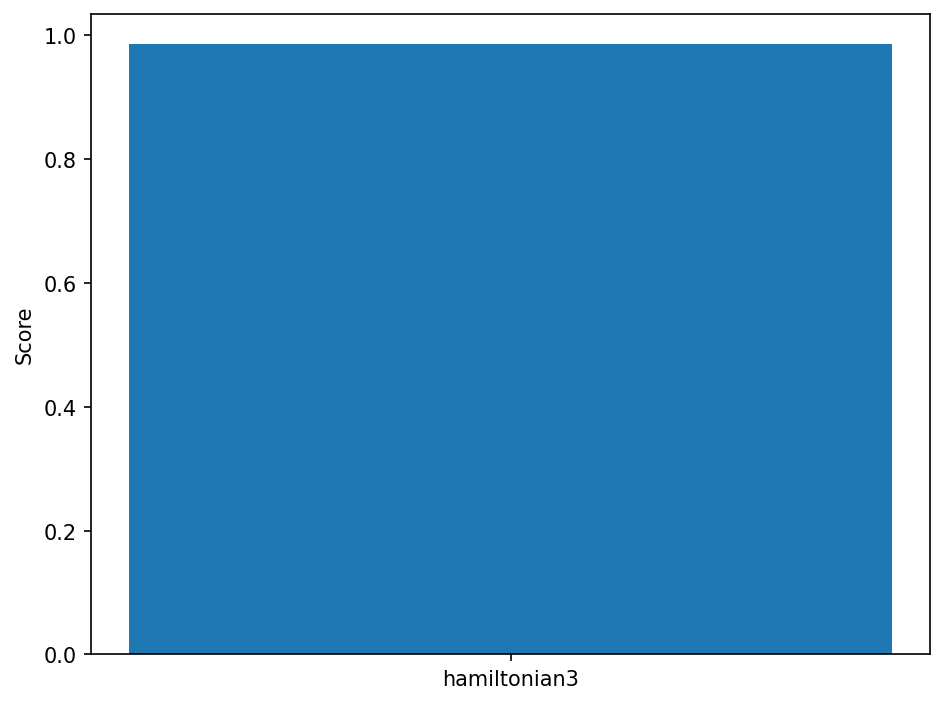

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: hamiltonian6 ; SCORE = 0.9871466094067257


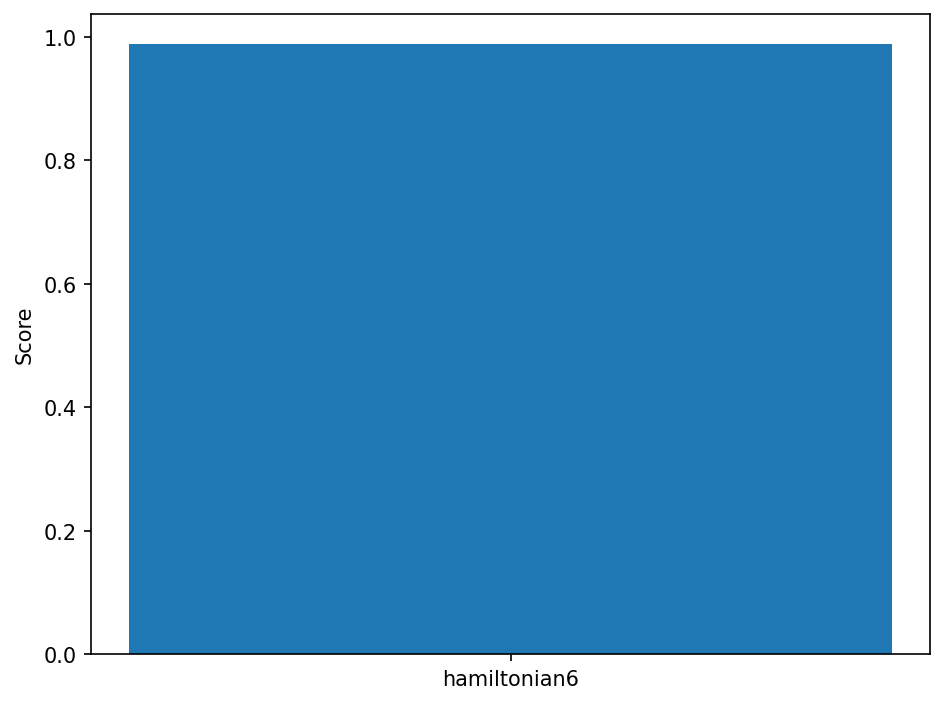

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: hamiltonian9 ; SCORE = 0.9884243871845035


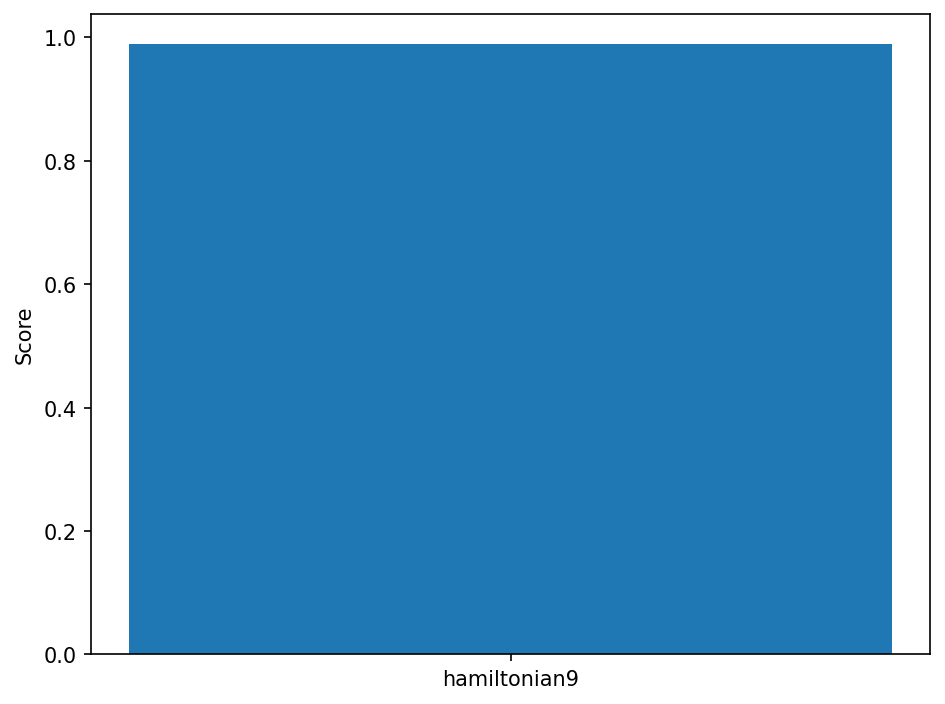

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: hamiltonian12 ; SCORE = 0.9909299427400609


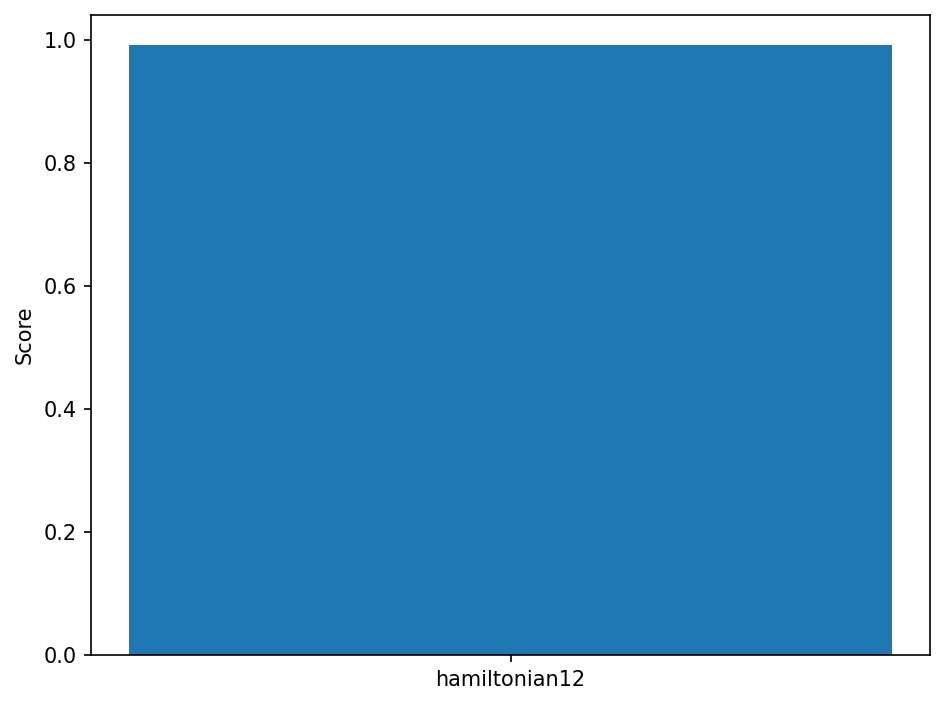

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: hamiltonian15 ; SCORE = 0.9934732760733953


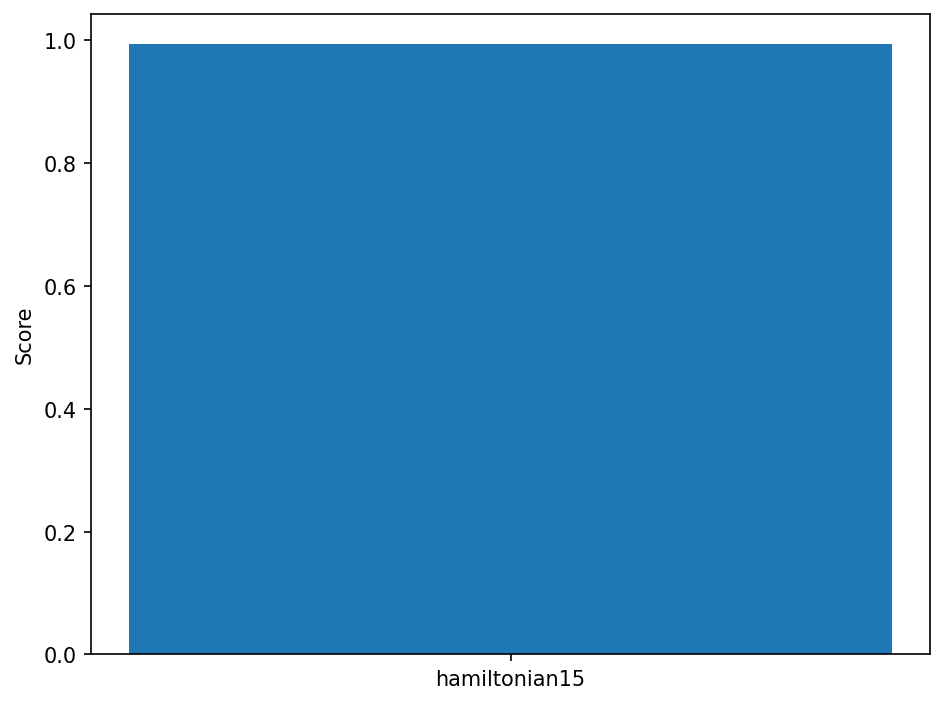

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: hamiltonian18 ; SCORE = 0.9947354982957275


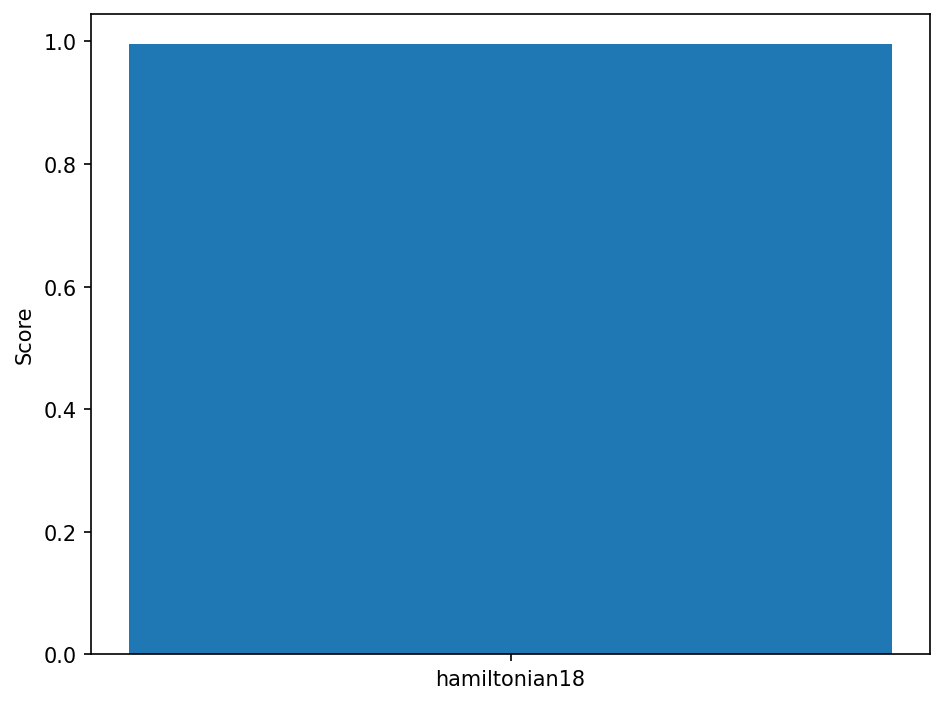

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: hamiltonian21 ; SCORE = 0.9948942284548223


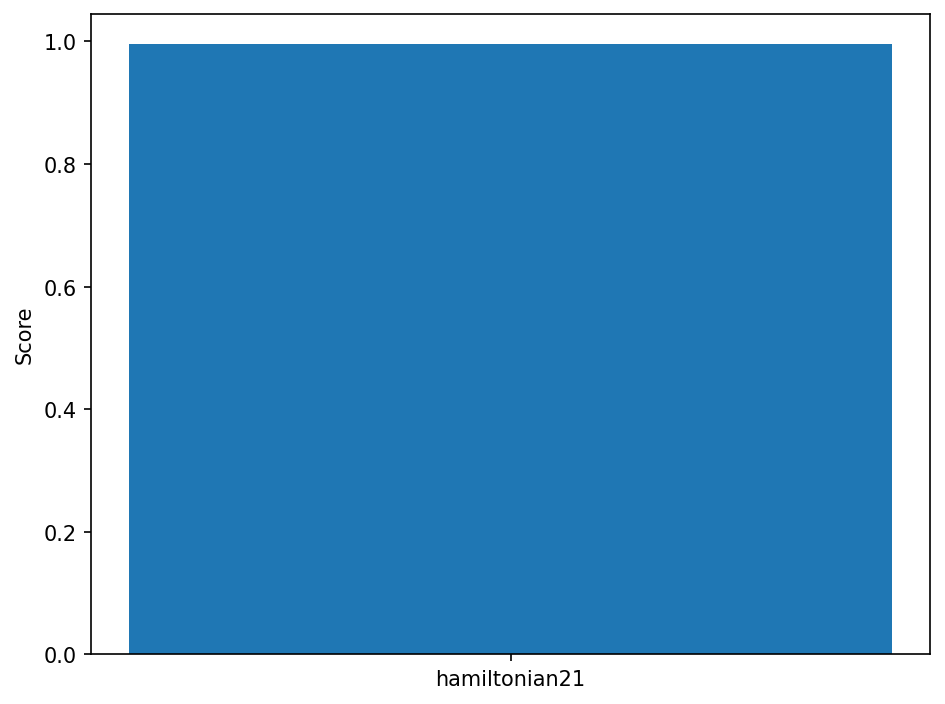

-----------------------------------------------------------
USED BACKEND:: fake_johannesburg ; CIRCUIT_NAME: hamiltonian3 ; SCORE = 0.9327132760733925


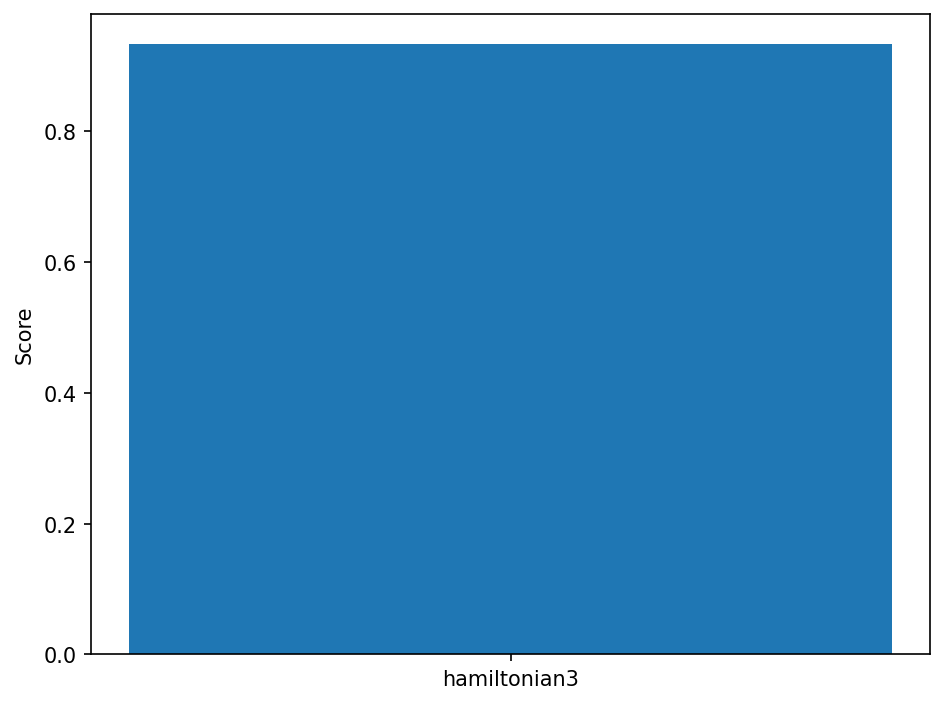

-----------------------------------------------------------
USED BACKEND:: fake_johannesburg ; CIRCUIT_NAME: hamiltonian6 ; SCORE = 0.9267132760733923


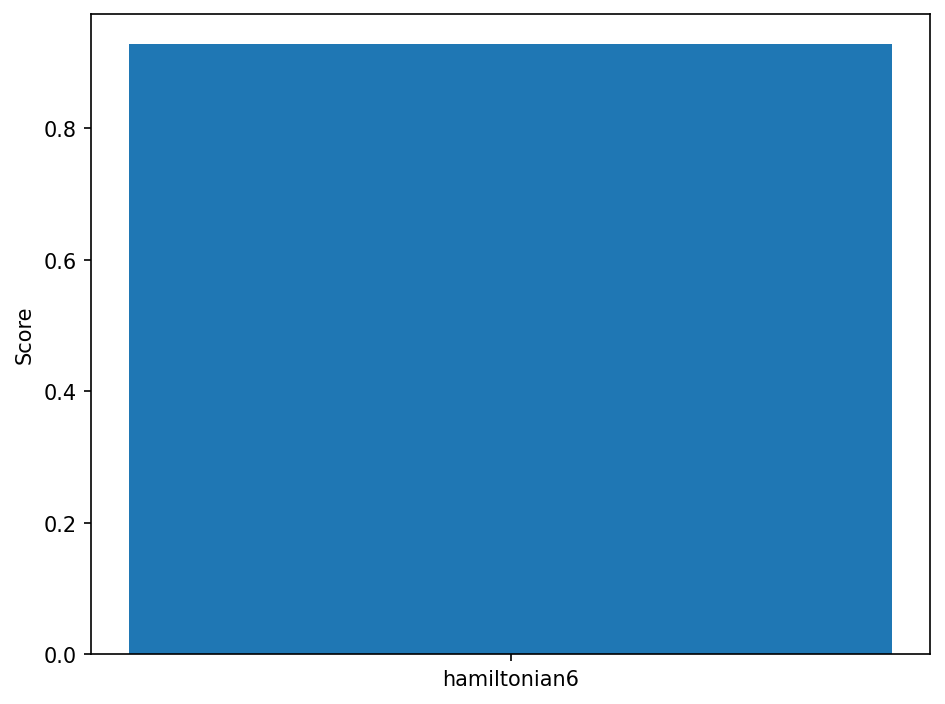

-----------------------------------------------------------
USED BACKEND:: fake_johannesburg ; CIRCUIT_NAME: hamiltonian9 ; SCORE = 0.9204910538511701


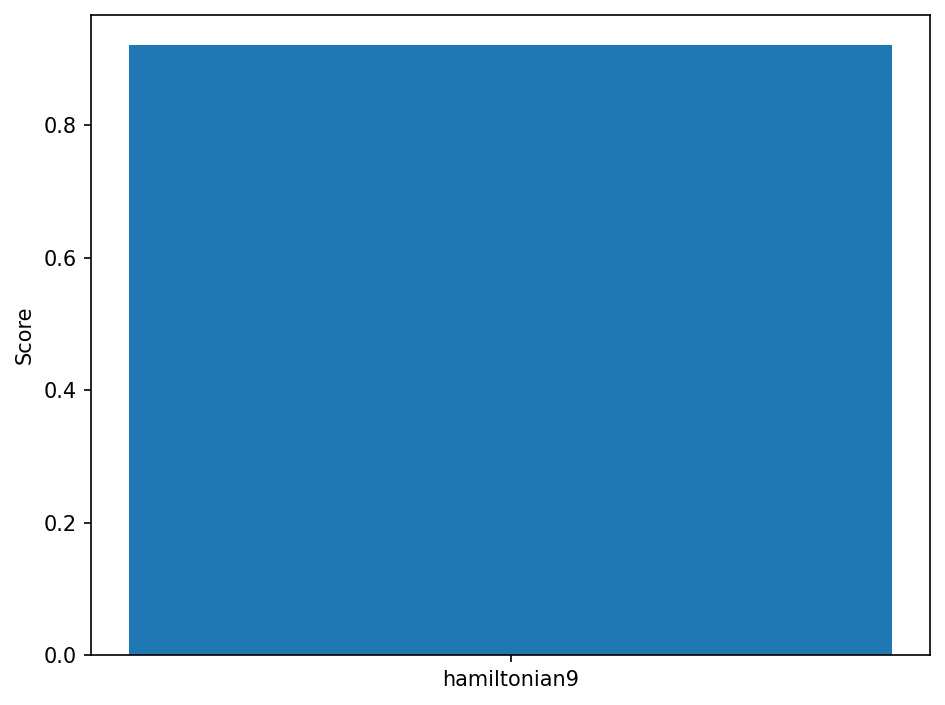

-----------------------------------------------------------
USED BACKEND:: fake_johannesburg ; CIRCUIT_NAME: hamiltonian12 ; SCORE = 0.9205299427400607


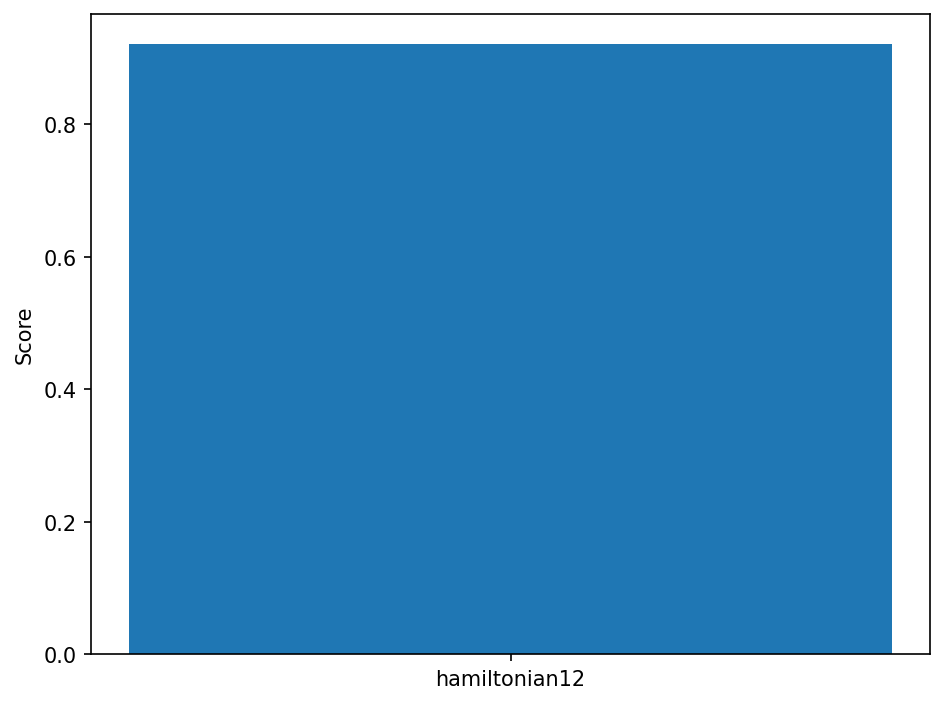

-----------------------------------------------------------
USED BACKEND:: fake_johannesburg ; CIRCUIT_NAME: hamiltonian15 ; SCORE = 0.91961994274006


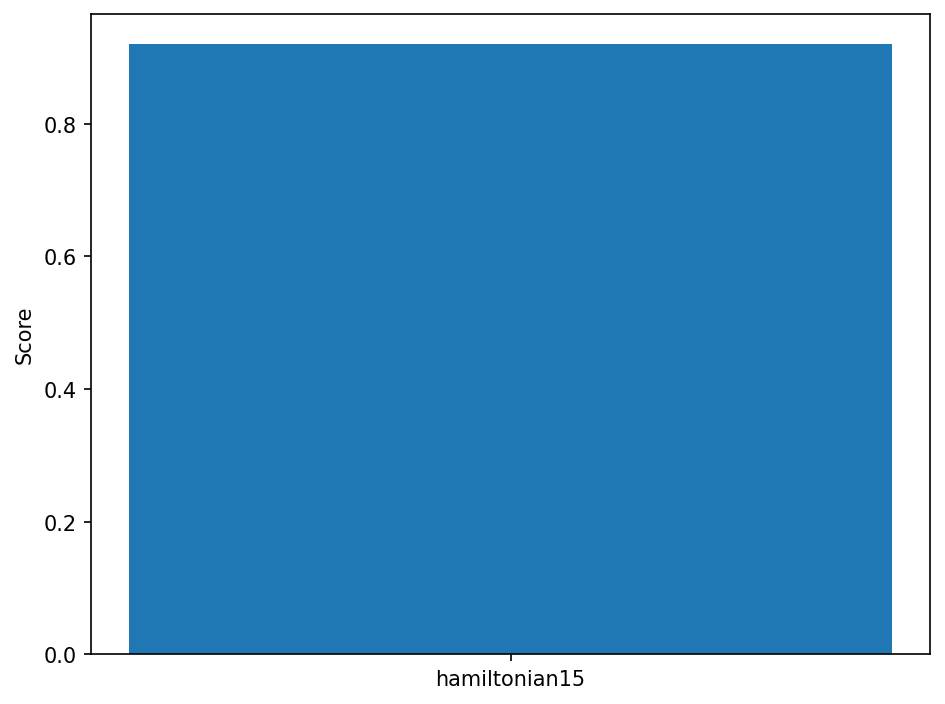

-----------------------------------------------------------
USED BACKEND:: fake_johannesburg ; CIRCUIT_NAME: hamiltonian18 ; SCORE = 0.9223466094068392


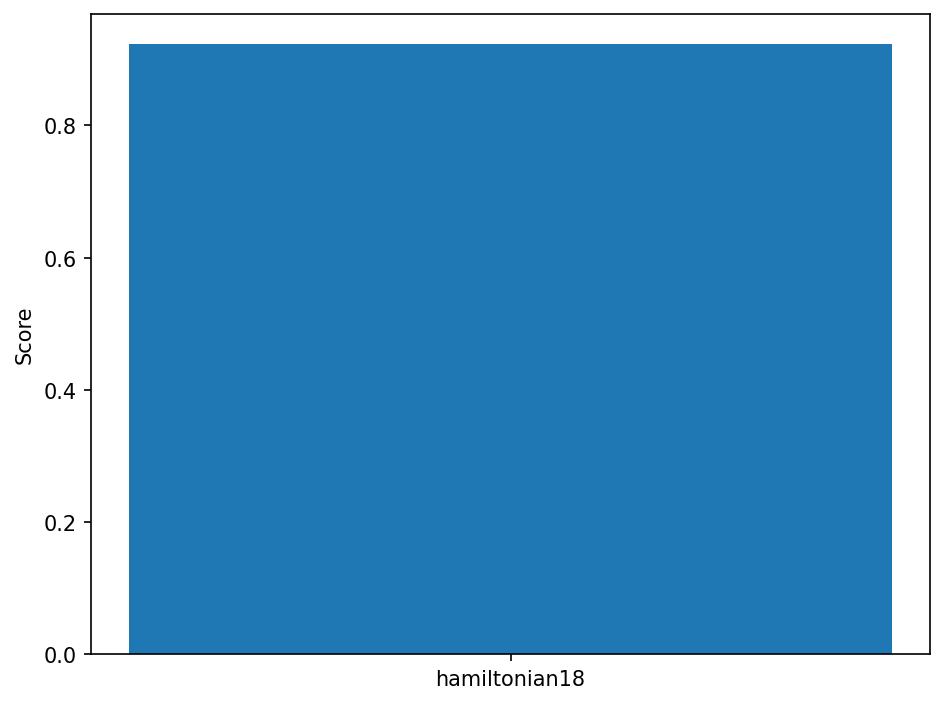

-----------------------------------------------------------
USED BACKEND:: fake_johannesburg ; CIRCUIT_NAME: hamiltonian21 ; SCORE = 0.9248466094072041


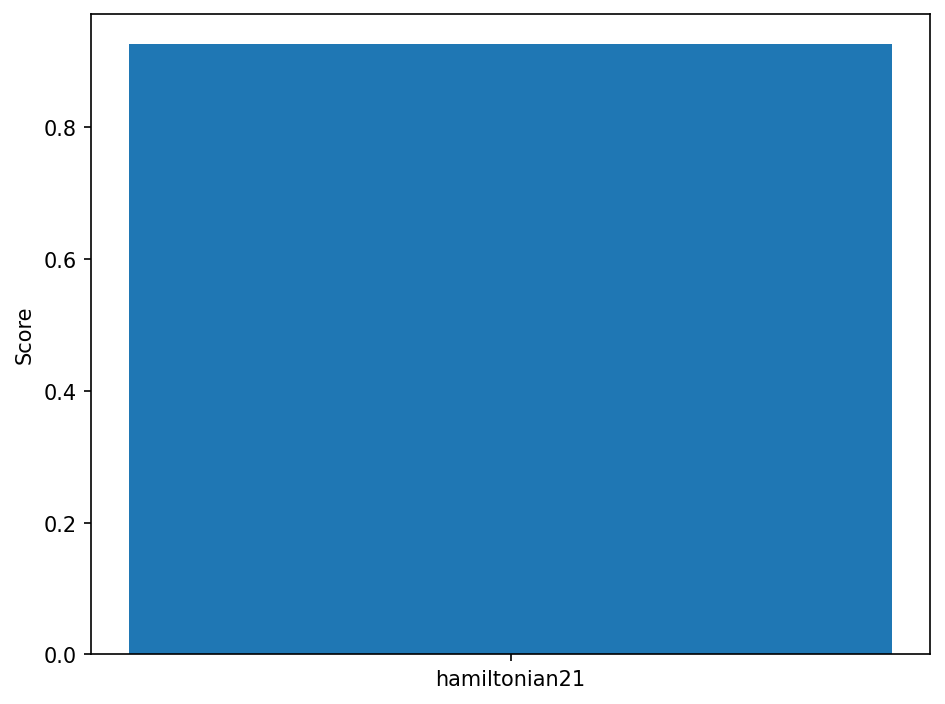

-----------------------------------------------------------


In [8]:
for label,benchmark,backend,job,score,sd in jobs:
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

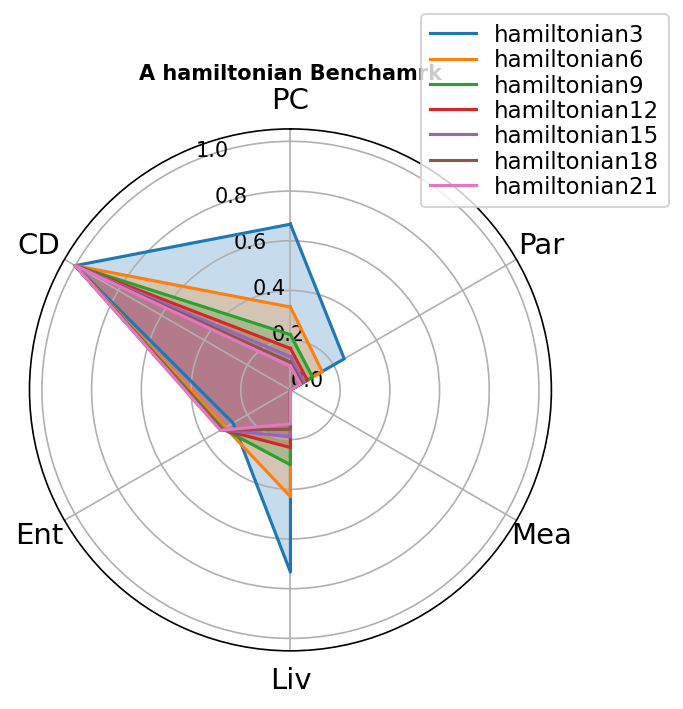

In [9]:
names=[]
scores=[]
X="A "+name_of_algo+' Benchamrk'
for i,j in benchmark_features.items():
    names.append(i)
    scores.append(j)
supermarq.plotting.plot_benchmark([X,names,scores],
        spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],show=True)

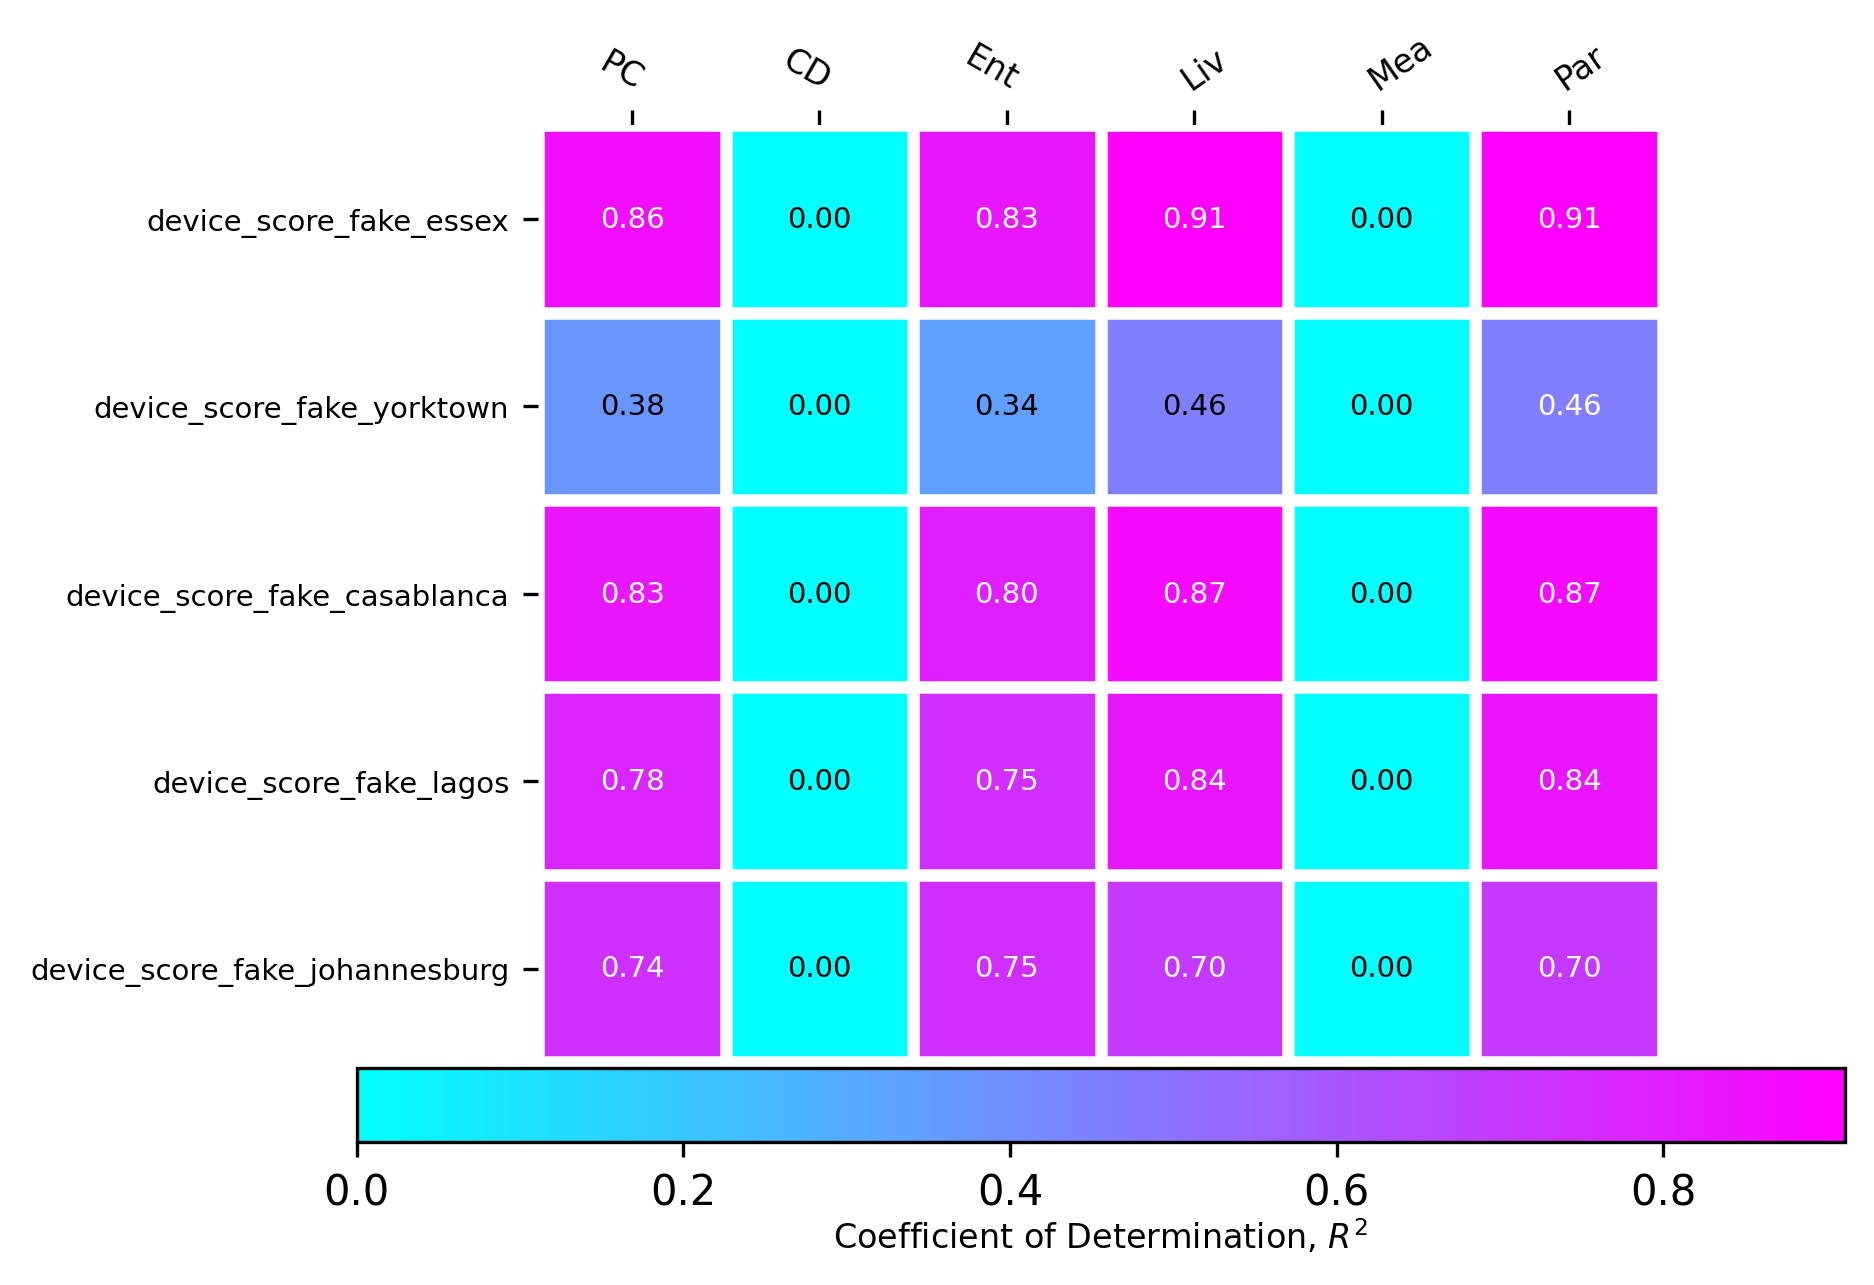

In [10]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

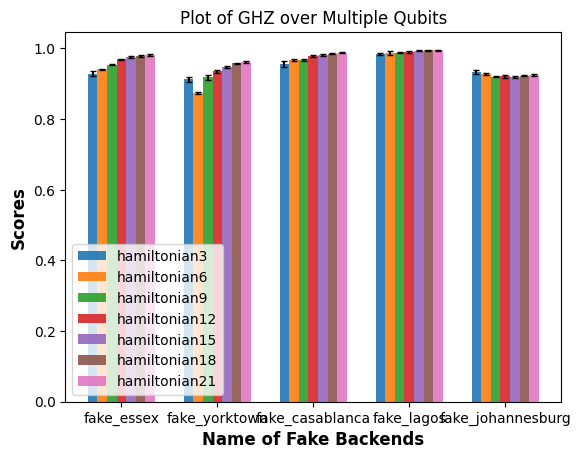

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
all_fake_names=[]
all_score=[]
all_sd=[]
all_ckt=[]
for i in selected_fakes:
    all_fake_names.append(i().name)    
for benchmark, label in benchmarks:
    i=[]
    j=[]
    k=[]
    for ckt,benchmark,backend,job,score,sd in jobs:
        if ckt == label:
            i.append(score)
            j.append(sd)
    all_ckt.append(label)
    all_score.append(i)
    all_sd.append(j)
num_bars = len(all_score)
width = 0.1
x = np.arange(len(all_fake_names)) # x-axis positions for each bar
fig, ax = plt.subplots()
for i in range(num_bars):               # Create bars for each category with appropriate offsets
    ax.bar(x + i * width, all_score[i], width=width, label=f'Bar {i+1}', 
           yerr=all_sd[i],align='center',alpha=0.9,ecolor='black',capsize=2)
ax.set_xlabel('Name of Fake Backends',fontweight ='bold',fontsize = 12)
ax.set_ylabel('Scores',fontweight ='bold',fontsize = 12)
ax.set_title('Plot of GHZ over Multiple Qubits')
ax.set_xticks(x + (num_bars - 1) * width / 2)
ax.set_xticklabels(all_fake_names)
ax.legend(all_ckt,loc="lower left")
#ax.grid(True)
plt.show()